# Exercises
For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate

In [2]:
# Imports
from vega_datasets import data
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Part I
Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min data.sf_temps()and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

# 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
#Loading in dataset
sf_temp_ds= data.sf_temps()

In [4]:
#Looking at first 5 values of dataset
sf_temp_ds.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [5]:
#Looking at datatypes
sf_temp_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [6]:
# Step 2 and 3 combined: Set 'Date' column as Index and sort the index:

sf_temp_ds = sf_temp_ds.set_index('date').sort_index()

In [7]:
# resample the whole dataframe temparature using mean as an aggregator

sf_temp_ds.resample('M').mean()

,temp
date,
2010-01-31,49.98
2010-02-28,52.24
2010-03-31,53.96
2010-04-30,55.63
2010-05-31,57.97
2010-06-30,60.44
2010-07-31,61.77
2010-08-31,62.41
2010-09-30,62.49


<AxesSubplot:xlabel='date'>

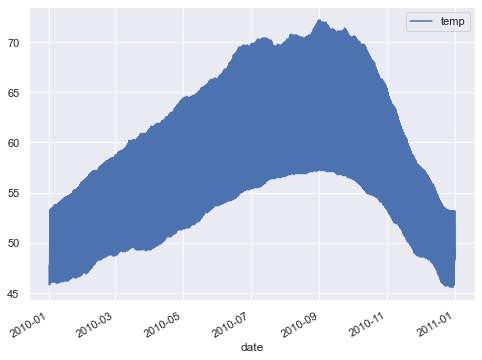

In [8]:
# use pandas .plot()
sf_temp_ds.plot()

# 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

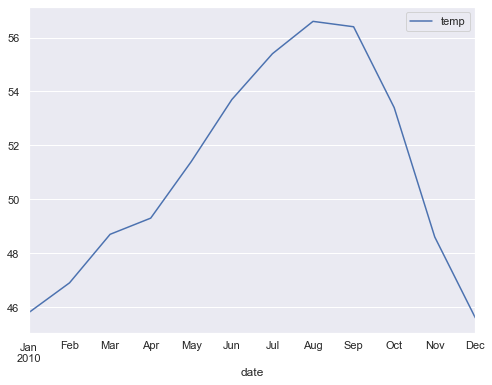

In [9]:
sf_temp_ds.resample('M').min().plot()

# 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

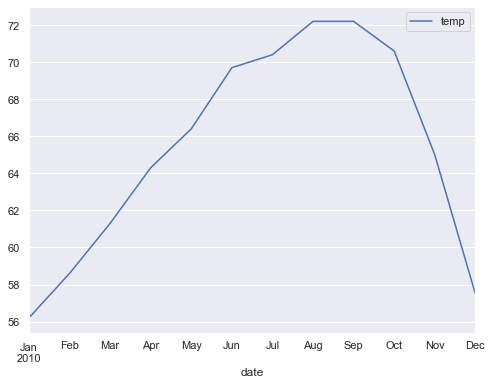

In [10]:
sf_temp_ds.resample('M').max().plot()

# 4. Which month is the coldest, on average?

In [11]:
#Print out first index by indexing
sf_temp_ds.resample('M').mean().sort_values(by='temp')[:1]

,temp
date,
2010-01-31,49.98


# 5. Which month has the highest average temperature?

In [12]:
#Print out last value using tail function
sf_temp_ds.resample('M').mean().sort_values(by='temp').tail(1)

,temp
date,
2010-09-30,62.49


# 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [13]:
#Resample by the day and calculate the min and max temp for the day
sf_df= sf_temp_ds.resample('D').agg(['min', 'max'])

In [ ]:
#Resample by the day and calculate the min and max temp for the day 
# sf_df= sf_temp_ds.temp.resample('D').agg(['min', 'max'])

- Note: can use code above (commented out) to get rid of multi-level index of temp

In [14]:
#Looking at first 5 values
sf_df.head()

temp      
             min   max
date                  
2010-01-01 45.80 53.30
2010-01-02 46.00 53.40
2010-01-03 46.10 53.50
2010-01-04 46.10 53.60
2010-01-05 46.10 53.80

In [15]:
#Creating difference column
sf_df['diff']= sf_df.temp['max'] - sf_df.temp['min']

In [16]:
#Groupby month, aggregate by mean, sort values, and print last row
sf_df.resample('M').mean().sort_values(by='diff').tail(1)

temp        diff
             min   max      
date                        
2010-09-30 56.90 71.31 14.40

# 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

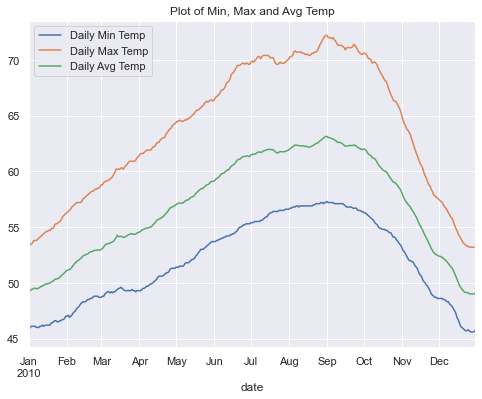

In [17]:
# %matplotlib notebook


sf_temp_ds.resample('D').min().temp.plot(label= "Daily Min Temp")
sf_temp_ds.resample('D').max().temp.plot(label= "Daily Max Temp")
sf_temp_ds.resample('D').mean().temp.plot(label= "Daily Avg Temp")
plt.title('Plot of Min, Max and Avg Temp')
plt.legend()
plt.show()

# Part II
Use the dataset to answer the following questions:

# 1. Which year and month combination has the highest amount of precipitation?

In [18]:
seattle_df= data.seattle_weather()

In [19]:
seattle_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [20]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [21]:
# Step 2 and 3 combined: Set 'Date' column as Index and sort the index:

seattle_df = seattle_df.set_index('date').sort_index()

In [35]:
#Answer
seattle_df.resample('M').sum().precipitation.sort_values().tail()

date
2012-03-31   183.00
2012-11-30   210.50
2015-11-30   212.60
2014-03-31   240.00
2015-12-31   284.50
Name: precipitation, dtype: float64

# 2. Visualize the amount of monthly precipitation over time.

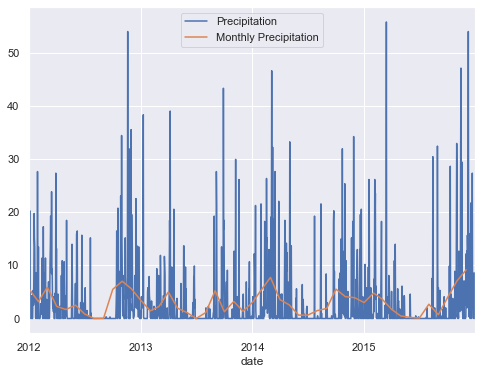

In [37]:
# Visualize with raw precipitation data
seattle_df.precipitation.plot(label= 'Precipitation')
seattle_df.resample('M').mean().precipitation.plot(label= 'Monthly Precipitation')
plt.legend()

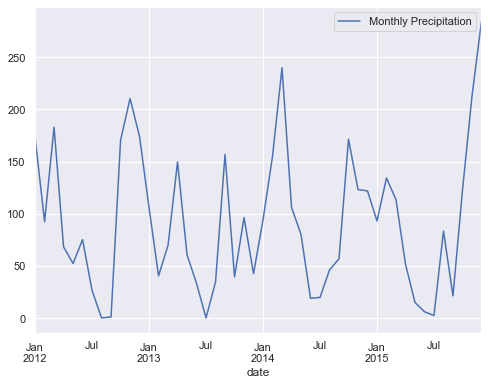

In [44]:
# Visualize without raw precipitation data
seattle_df.resample('M').sum().precipitation.plot(label= 'Monthly Precipitation')
plt.legend()

# 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

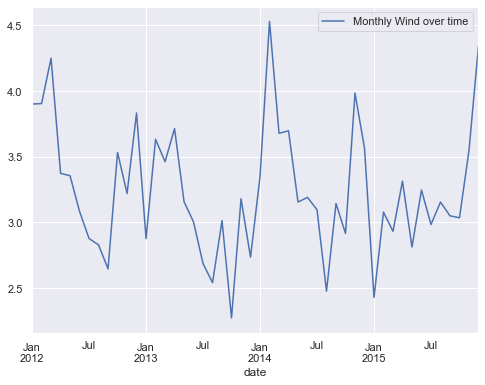

In [30]:
seattle_df.resample('M').mean().wind.plot(label= 'Monthly Wind over time')
plt.legend()

# 4. Which year-month combination is the windiest?

In [40]:
seattle_df.wind.resample('M').mean().sort_values().tail(5)

date
2012-02-29   3.90
2014-11-30   3.98
2012-03-31   4.25
2015-12-31   4.34
2014-02-28   4.53
Name: wind, dtype: float64

# 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [41]:
seattle_df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [46]:
# make a new column 'is_sunny'
seattle_df['is_sunny'] = seattle_df.weather == 'sun'

In [ ]:
seattle_df.resample('Y').is_sunny.mean()

In [47]:
seattle_df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False
2012-01-03,0.80,11.70,7.20,2.30,rain,False
2012-01-04,20.30,12.20,5.60,4.70,rain,False
2012-01-05,1.30,8.90,2.80,6.10,rain,False


# 6. In which month does it rain the most?

In [48]:
seattle_df['month'] = seattle_df.index.month

In [49]:
seattle_df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month
date,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,1
2012-01-02,10.90,10.60,2.80,4.50,rain,False,1
2012-01-03,0.80,11.70,7.20,2.30,rain,False,1
2012-01-04,20.30,12.20,5.60,4.70,rain,False,1
2012-01-05,1.30,8.90,2.80,6.10,rain,False,1


In [51]:
# total rainfall by month
seattle_df.groupby('month').precipitation.sum().sort_values()

month
7     48.20
6    132.90
8    163.70
5    207.50
9    235.50
4    375.40
2    422.00
1    466.00
10   503.40
3    606.20
12   622.70
11   642.50
Name: precipitation, dtype: float64

# 7. Which month has the most number of days with a non-zero amount of precipitation?

In [52]:
# did it actually rain?
seattle_df['did_rain'] = seattle_df.precipitation > 0

In [53]:
seattle_df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month,did_rain
date,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,1,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False,1,True
2012-01-03,0.80,11.70,7.20,2.30,rain,False,1,True
2012-01-04,20.30,12.20,5.60,4.70,rain,False,1,True
2012-01-05,1.30,8.90,2.80,6.10,rain,False,1,True


In [54]:
seattle_df.groupby('month').did_rain.mean().sort_values().tail(5)

month
1    0.53
3    0.59
11   0.59
2    0.65
12   0.65
Name: did_rain, dtype: float64

# Part III
# 1. Convert any negative delays to 0.

In [55]:
flights_df= data.flights_20k()

In [56]:
flights_df = data.flights_20k().set_index('date').sort_index()
flights_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [57]:
# how many observations?
flights_df.shape

(20000, 4)

In [59]:
# what time period the data span:

flights_df.index.min(), flights_df.index.max()

(Timestamp('2001-01-01 00:01:00'), Timestamp('2001-03-31 21:30:00'))

In [60]:
def delay_to_zero(x):
    if x < 0:
        x = 0
    return x

In [61]:
# use the function (.apply)

%timeit flights_df.delay = flights_df.delay.apply(delay_to_zero)

4.97 ms ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [62]:
# another method (np.where). Much faster if you have large dataset

%timeit flights_df.delay = np.where(flights_df.delay < 0, 0, flights_df.delay)

212 µs ± 4.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [63]:
flights_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


# 2. Which hour of the day has the highest average delay?

In [64]:
flights_df['hour'] = flights_df.index.hour

flights_df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [65]:
# groupby by 'hour' and look at mean delay:

flights_df.groupby('hour').delay.mean().sort_values().tail(5)

hour
22    32.70
23    65.35
0    127.92
1    170.00
3    302.50
Name: delay, dtype: float64

# 3. Does the day of the week make a difference in the delay amount?

In [66]:
flights_df['week_day'] = flights_df.index.day_name()

In [67]:
# groupby the weekday and find mean delay:

flights_df.groupby('week_day').delay.mean()

week_day
Friday      17.76
Monday       7.17
Saturday     8.43
Sunday      10.41
Thursday    12.82
Tuesday      9.41
Wednesday   11.03
Name: delay, dtype: float64

# 4. Does the month make a difference in the delay amount?

In [69]:
flights_df['month'] = flights_df.index.month
flights_df.groupby('month').delay.mean()

month
1   11.30
2   12.31
3    9.88
Name: delay, dtype: float64